In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,NaN,2.88660,NaN,0.21541,3.09000,NaN,0.51035,0.03043,0.10066
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.84450
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.63358
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.73460
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.94706
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.85140
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.75560
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,NaN,0.92540,1.84110,3.47730,0.95496,NaN,NaN
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,NaN,NaN,3.43740,1.81620,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	6
float64		column 3	12
float64		column 4	25
float64		column 5	6
float64		column 6	31
float64		column 7	18
float64		column 8	6
float64		column 9	25
float64		column 10	18
float64		column 11	18
float64		column 12	54


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,400.000000,394.000000,388.000000,375.000000,394.000000,369.000000,382.000000,394.000000,375.000000,382.000000,382.000000,346.000000
mean,-0.100319,0.035172,2.046546,1.895394,1.926163,1.987232,2.018318,1.989807,1.976977,2.032539,1.968436,1.976161
std,2.564450,2.758568,1.135976,1.154287,1.164180,1.151223,1.159239,1.140855,1.148044,1.155152,1.153378,1.196353
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.694850,-0.874915,1.124700,0.932790,0.878337,1.045500,0.981695,1.030050,1.075250,1.040900,0.919010,0.946235
50%,-0.068013,0.015595,2.095050,1.758500,1.891700,2.006200,2.101400,1.985950,2.065300,2.088500,1.931200,1.925400
75%,0.763967,0.887540,3.001300,2.816650,2.951250,3.000600,2.965050,3.038500,2.951400,3.040750,2.966425,3.033450
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.974900,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

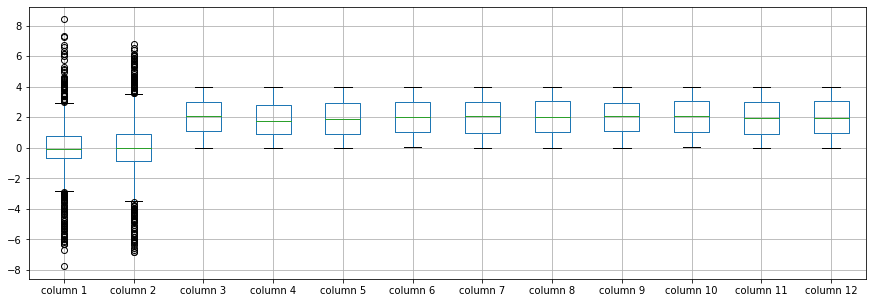

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.100319
column 2     0.035172
column 3     2.046546
column 4     1.895394
column 5     1.926163
column 6     1.987232
column 7     2.018318
column 8     1.989807
column 9     1.976977
column 10    2.032539
column 11    1.968436
column 12    1.976161
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.016887,-0.034243,-0.088754,0.002625,0.019192,-0.018490,0.041999,-0.005982,0.030236,0.071075,0.012789
column 2,0.016887,1.000000,-0.054512,0.044843,-0.082749,-0.087159,0.011194,-0.032745,-0.028650,0.001351,-0.052243,0.062993
column 3,-0.034243,-0.054512,1.000000,-0.002921,-0.038436,-0.065906,-0.056912,0.078253,0.132209,-0.029736,-0.092714,-0.005272
column 4,-0.088754,0.044843,-0.002921,1.000000,-0.042589,0.090685,0.016853,0.076491,0.004048,0.052638,-0.047932,-0.089299
column 5,0.002625,-0.082749,-0.038436,-0.042589,1.000000,0.070254,0.037177,0.009324,0.005183,0.041660,0.002866,-0.020048
column 6,0.019192,-0.087159,-0.065906,0.090685,0.070254,1.000000,0.008913,0.057053,-0.005129,0.000661,0.037992,-0.013384
column 7,-0.018490,0.011194,-0.056912,0.016853,0.037177,0.008913,1.000000,-0.030807,0.065604,0.037177,-0.014237,-0.084603
column 8,0.041999,-0.032745,0.078253,0.076491,0.009324,0.057053,-0.030807,1.000000,0.073755,-0.124926,-0.055137,0.014080
column 9,-0.005982,-0.028650,0.132209,0.004048,0.005183,-0.005129,0.065604,0.073755,1.000000,0.002757,-0.007175,0.036901
column 10,0.030236,0.001351,-0.029736,0.052638,0.041660,0.000661,0.037177,-0.124926,0.002757,1.000000,0.006487,-0.009387


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+15,12+15+15,12+15+15+15,12+15+15+15+15,12+15+15+15+15+15,12+15+15+15+15+15+15,12+15+15+15+15+15+15+15,12+15+15+15+15+15+15,12+15+15+15+15+15,12+15+15+15+15,12+15+15+15,12+15+15,12+15,12], vae_layer = False, seed = 15)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.703759689331054
Epoch: 1 , loss: 26.656458740234374
Epoch: 2 , loss: 26.618776931762696
Epoch: 3 , loss: 26.565616302490234
Epoch: 4 , loss: 26.47845329284668
Epoch: 5 , loss: 26.438826446533202
Epoch: 6 , loss: 26.39353187561035
Epoch: 7 , loss: 26.14928482055664
Epoch: 8 , loss: 25.12645393371582
Epoch: 9 , loss: 22.96425857543945
Epoch: 10 , loss: 21.984897003173828
Epoch: 11 , loss: 21.4078670501709
Epoch: 12 , loss: 21.215776901245118
Epoch: 13 , loss: 21.005803604125976
Epoch: 14 , loss: 20.50298942565918
Epoch: 15 , loss: 20.593873596191408
Epoch: 16 , loss: 20.35649482727051
Epoch: 17 , loss: 20.16081085205078
Epoch: 18 , loss: 20.332538146972656
Epoch: 19 , loss: 19.84431983947754
Epoch: 20 , loss: 19.84077606201172
Epoch: 21 , loss: 19.883063354492187
Epoch: 22 , loss: 19.62671974182129
Epoch: 23 , loss: 19.475944900512694
Epoch: 24 , loss: 19.459453811645506
Epoch: 25 , loss: 19.520312652

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,-1.224944,0.0,-1.83028,0.0,0.000000,-0.162413,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
396,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
397,0.0,0.0,0.0,0.000000,0.0,0.43609,0.0,0.000000,0.000000,0.0,0.380568,-0.272351
398,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,1.152953,0.421326,0.0,0.000000,1.281156


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(23.575991953477335, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.1443948443100868

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,0.611356,2.88660,0.63932,0.21541,3.090000,0.621017,0.51035,0.030430,0.100660
1,0.029389,0.206580,0.48861,1.434300,3.12990,1.27780,1.42850,0.143330,1.194800,2.13180,0.984730,3.844500
2,-1.115400,0.217560,1.61050,1.337100,3.76820,1.21000,3.99630,2.217300,3.902900,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.36486,0.332780,0.19027,0.56716,1.66010,2.352700,0.661260,3.13510,3.938100,3.734600
4,-0.268400,-1.006000,2.88220,1.561600,3.20140,3.37740,1.52260,0.984750,3.109400,3.65640,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.704800,0.88269,0.35406,1.62780,3.294000,1.085000,0.15740,0.465040,2.851400
396,0.264630,-6.107600,3.90540,1.337700,1.41870,1.68610,1.09510,3.793600,0.127900,0.54249,3.365800,3.755600
397,-3.479100,-1.993300,1.32480,1.772100,2.55090,1.90619,0.92540,1.841100,3.477300,0.95496,1.906868,1.851449
398,7.293000,-0.411470,2.49480,0.396550,2.99900,3.41010,2.95160,1.430953,1.411916,3.43740,1.816200,1.368368


In [20]:
imputations[-1].to_excel("Difdoug_AN_5(imp).xlsx", index=False, header=False)